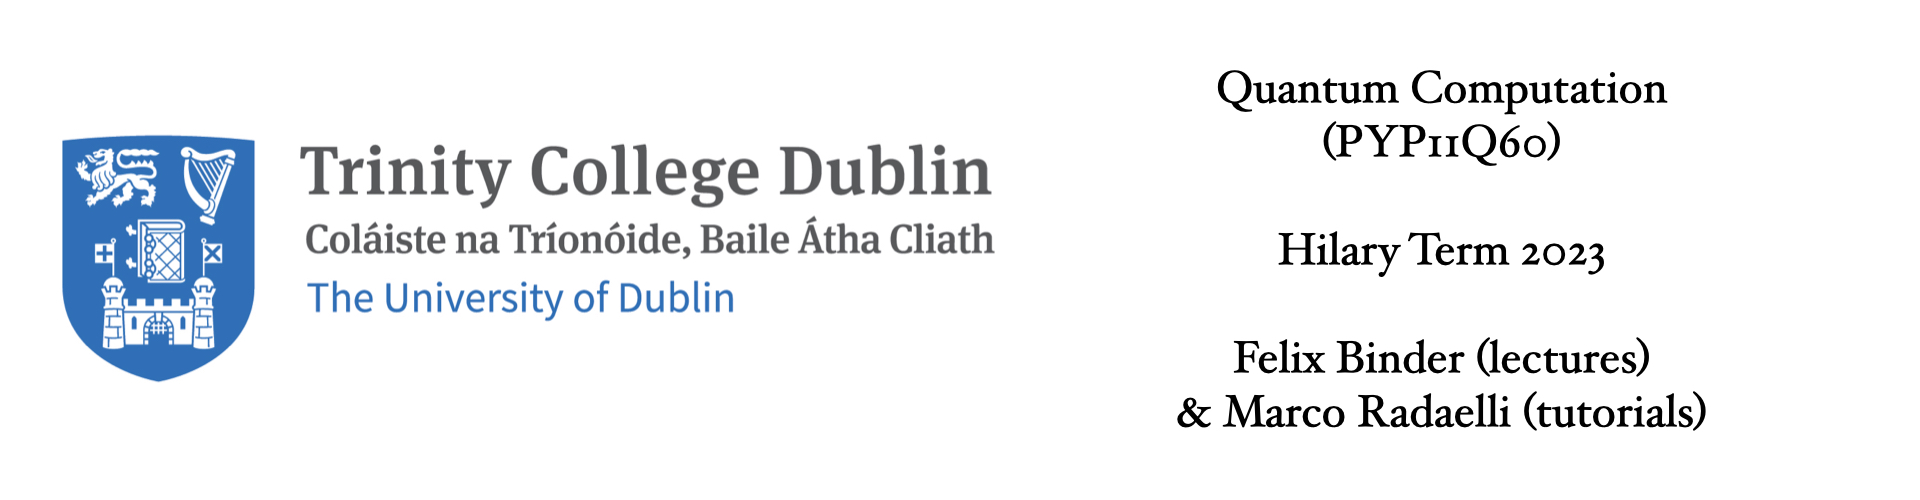

# Problem set 3

## General directions
<ul>
    <li>Some of the following exercises are numerical. They should be performed directly within this notebook. Other exercises are analytical, and should be solved on attached documents. You may submit handwritten solutions for the latter, but please make sure to write in a comprehensible manner.</li>
    <li>For the numerical tasks, please comment your code to explain what does what. Use meaningful names for variables and functions. </li>
    <li>We will need to be able to run the notebook. Make sure that there are no dependencies in the notebook based on files on your computer!</li>
    <li>Feel free to look online for help! Python documentation is <a href="https://docs.python.org/3/">here</a>, NumPy documentation <a href="https://numpy.org/doc/stable/">here</a>, and the Qiskit manual is <a href="https://qiskit.org/documentation/">here</a>. Some specific pages of Qiskit documentation or other useful sources are linked in the relevant questions.</li>
</ul>

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# 3.0 - Dependencies
Please add all relevant dependencies for the problems to the following cell and avoid the <code>import</code> command elsewhere.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import qiskit
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram

# 3.1 - Quantum Fourier Transform (3 pts.)

Consider the unitary operator $\mathcal{F}$ for the Quantum Fourier Transform (QFT)
$$\mathcal{F} \ket{j} = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1} e^{2\pi i j k /N}\ket{k}.$$
<ol>
    <li>Compute explicitly the Fourier transform on the $n$ qubits state $\ket{0\ldots 0}$</li>
    <li>We already know a quantum circuit for $\mathcal{F}$ from the lectures. In Qiskit, create that circuit for 5 qubits, and transform it into a gate using the appropriate functions.</li>
        <li>Give a quantum circuit for the inverse Quantum Fourier Transform (i.e., for the operator $\mathcal{F}^\dagger$) on 5 qubits. Create that circuit in Qiskit and also transform it into a gate.</li>
    <li>Again using Qiskit, create the circuits $\mathcal{F}\mathcal{F}^\dagger$ and $\mathcal{F}^\dagger\mathcal{F}$. Obtain the matrix representation of the two circuits, and show that it is equal to the identity in both cases.</li>
</ol>

In [137]:
"""
3.1.2
"""
n = 5
QFTqcirc = qiskit.QuantumCircuit(n)

def qft(qc,n,n_0):
    n-=1 # Moving to the next qubit
    
    qc.h(n) # Apply hadamard to the most significant qubit
   
    for qubit in range(1,n+1):
        # For each less significant qubit, we need to do a smaller-angled controlled rotation:
        qc.cp(np.pi/2**(qubit), n-qubit, n)  
    if n > 0:
        qft(qc,n,n_0)
    else:
        # Perform swaps at the end
        for qubit in range(n_0//2):
            qc.swap(qubit, n_0-qubit-1)
        return qc

qft(QFTqcirc,n,n)
QFT_gate = QFTqcirc.to_gate(label = 'QFT')
QFTqcirc.draw()

»
q_0: ───────────────────────────────────────────────■──────────────────────»
                                                    │                      »
q_1: ─────────────────────────────■─────────────────┼─────────■────────────»
                                  │                 │         │       ┌───┐»
q_2: ───────────────■─────────────┼────────■────────┼─────────┼───────┤ H ├»
                    │       ┌───┐ │        │P(π/2)  │         │P(π/4) └───┘»
q_3: ──────■────────┼───────┤ H ├─┼────────■────────┼─────────■────────────»
     ┌───┐ │P(π/2)  │P(π/4) └───┘ │P(π/8)           │P(π/16)               »
q_4: ┤ H ├─■────────■─────────────■─────────────────■──────────────────────»
     └───┘                                                                 »
«                                              ┌───┐   
«q_0: ─■─────────────────■─────────────■───────┤ H ├─X─
«      │                 │       ┌───┐ │P(π/2) └───┘ │ 
«q_1: ─┼────────■────────┼───────┤ H ├─■─────────X───┼─
«      │        │P(π/2)  │P(π/4) └───┘           │   │ 
«q_2: ─┼────────■────────■───────────────────────┼───┼─
«      │P(π/8)                                   │   │ 
«q_3: ─■─────────────────────────────────────────X───┼─
«                                                    │ 
«q_4: ───────────────────────────────────────────────X─
«

In [138]:
"""
3.1.3
"""
n = 5
def inv_qft(qc, n):
    # Perform swaps at the start
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for i in range(n): # Opposite of the n=-1 used above in 3.1.2
        for qubit in range(i):
            qc.cp(-np.pi/2**(i-qubit), qubit, i) # Apply the opposite rotations as above
        qc.h(i) 
        #qc.barrier()
        
IQFTqc = qiskit.QuantumCircuit(n)
inv_qft(IQFTqc,n)
IQFT_gate = IQFTqc.to_gate(label = 'IQFT')
IQFTqc.draw()

┌───┐                                                            »
q_0: ─X─┤ H ├─■──────────────■───────────────────■───────────────────────»
      │ └───┘ │P(-π/2) ┌───┐ │                   │                       »
q_1: ─┼───X───■────────┤ H ├─┼─────────■─────────┼──────────────■────────»
      │   │            └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │        »
q_2: ─┼───┼──────────────────■─────────■─────────┼────────┤ H ├─┼────────»
      │   │                                      │P(-π/8) └───┘ │P(-π/4) »
q_3: ─┼───X──────────────────────────────────────■──────────────■────────»
      │                                                                  »
q_4: ─X──────────────────────────────────────────────────────────────────»
                                                                         »
«                                                                  
«q_0: ─■───────────────────────────────────────────────────────────
«      │                                                           
«q_1: ─┼────────────────────■──────────────────────────────────────
«      │                    │                                      
«q_2: ─┼──────────■─────────┼──────────────■───────────────────────
«      │          │P(-π/2)  │        ┌───┐ │                       
«q_3: ─┼──────────■─────────┼────────┤ H ├─┼─────────■─────────────
«      │P(-π/16)            │P(-π/8) └───┘ │P(-π/4)  │P(-π/2) ┌───┐
«q_4: ─■────────────────────■──────────────■─────────■────────┤ H ├
«                                                             └───┘

In [139]:
"""
3.1.4
"""
# FF†
qc1 = qiskit.QuantumCircuit(n)
qc1.append(QFT_gate,[0,1,2,3,4])
qc1.append(IQFT_gate,[0,1,2,3,4])

# F†F
qc2 = qiskit.QuantumCircuit(n)
qc2.append(IQFT_gate,[0,1,2,3,4])
qc2.append(QFT_gate,[0,1,2,3,4])

backend = Aer.get_backend('unitary_simulator')

#job execution and getting the result as an object
job = execute([qc1,qc2], backend)
result = job.result()

# Getting the unitary matrix from the result object
unitary1 = result.get_unitary(qc1, decimals=3)
unitary2 = result.get_unitary(qc2, decimals=3)

print("FF† matrix:\n",unitary1,"\nF†F matrix:\n",unitary2)    

FF† matrix:
 Operator([[ 1.-0.j, -0.+0.j, -0.-0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  1.-0.j, -0.-0.j, ..., -0.+0.j,  0.+0.j,  0.-0.j],
          [ 0.+0.j,  0.+0.j,  1.-0.j, ...,  0.+0.j,  0.+0.j,  0.+0.j],
          ...,
          [-0.-0.j, -0.-0.j, -0.+0.j, ...,  1.-0.j, -0.+0.j, -0.+0.j],
          [-0.-0.j, -0.+0.j, -0.+0.j, ...,  0.+0.j,  1.-0.j, -0.-0.j],
          [-0.-0.j, -0.-0.j, -0.+0.j, ...,  0.-0.j,  0.+0.j,  1.-0.j]],
         input_dims=(2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2)) 
F†F matrix:
 Operator([[ 1.-0.j,  0.+0.j,  0.+0.j, ...,  0.+0.j, -0.-0.j,  0.+0.j],
          [ 0.+0.j,  1.-0.j,  0.+0.j, ..., -0.-0.j,  0.+0.j, -0.-0.j],
          [-0.-0.j,  0.+0.j,  1.-0.j, ...,  0.+0.j, -0.+0.j,  0.+0.j],
          ...,
          [ 0.+0.j,  0.+0.j,  0.+0.j, ...,  1.-0.j,  0.+0.j,  0.-0.j],
          [ 0.+0.j,  0.+0.j, -0.-0.j, ...,  0.+0.j,  1.-0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j, ..., -0.+0.j,  0.+0.j,  1.-0.j]],
         input_dims=(2,

Both matrices are equivalent and equal to identity.

# 3.2 - Quantum Phase Estimation (8 pts. total)

## 3.2.a Qiskit code /1 (4 pts.)

<ol>
    <li>In Qiskit, create the quantum circuit for quantum phase estimation of a <code>T-gate</code>. How many qubits do you need to consider to obtain an exact value for the phase for the eigenstate $\ket{0}$? How many for the eigenstate $\ket{1}$?</li>
    <li>Create a complete Python function <code>phase_estimation(oracle, eigenstate, number_qubits)</code> which performs the phase estimation for a generic oracle <code>oracle</code> on the eigenstate <code>eigenstate</code>, employing <code>number_qubits</code> qubits. The function should perform a quantum simulation, and return the estimated value of the phase (i.e., to bit-precision of <code>number_qubits</code>). Apply the function to the <code>T-gate</code> of the previous exercise, and verify that it works as expected.</li>
    <li>Now, run the function with a different oracle, given by $R_z\left(\frac{1}{3}\right)$. What happens?</li>
    <li>In a graph, plot the highest-probability result obtained for the phase estimation of $R_z\left(\frac{1}{3}\right)$, as a function of the number of employed qubits <code>number_qubits</code>.</li>
</ol>

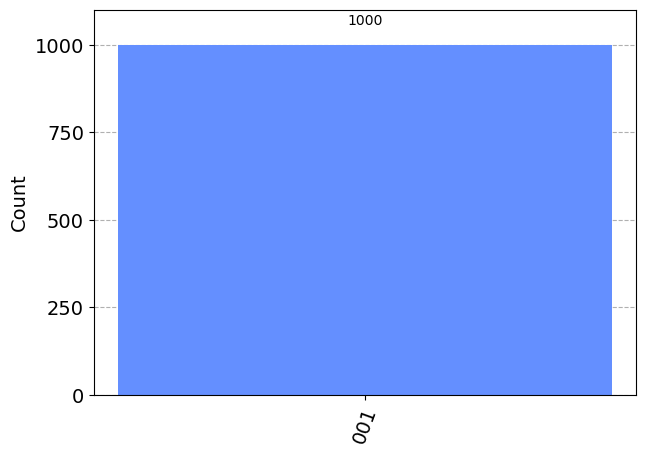

In [140]:
"""
3.2.a.1
"""
# Four qubits needed - 3 counting and 1 as the eigenstate of T.
n_count = 3 
QPEqcirc = qiskit.QuantumCircuit(n_count+1, n_count)

# Set initial state as |1>
QPEqcirc.x(n_count)

# Apply Hadamard to counting qubits to put them in |+> state.
for i in range(n_count):
    QPEqcirc.h(i)

# Apply the controlled-U. Each is applied 2^k times.
for k in range(n_count):
    reps = 2**k # Apply the unitary 2^k times
    for i in range(reps):
        QPEqcirc.cp(np.pi/4,k, n_count)

# Apply inverse QFT to counting qubits
inv_qft(QPEqcirc,n_count)

QPEqcirc.barrier()

# Perform measurment of counting qubits
for m in range(n_count):
    QPEqcirc.measure(m, m)
    
# Obtain results
# Use aer_simulator
simulator = Aer.get_backend('aer_simulator')
# Execute the circuit on the simulator
job = execute(QPEqcirc, simulator, shots=1000)
# Results from job
result = job.result()
# Return counts
counts = result.get_counts(QPEqcirc)
# Plot a histogram
plot_histogram(counts)



#QPEqcirc.draw()

For eigenstate $\ket{1}$ we need 3 counting qubits as $\theta = \frac{1}{2^n}$, which must equal $\frac{1}{8}$ for T$\ket{1}$.

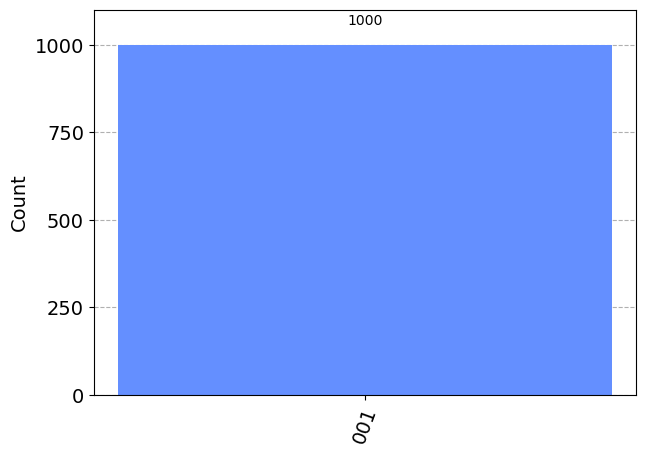

In [141]:
"""
3.2.a.2
"""
def phase_estimation(oracle, eigenstate, number_qubits):
    # Create circuit with number_qubits - 1 counting qubits
    QPEqc = qiskit.QuantumCircuit(number_qubits, number_qubits-1)
    
    # If eigenstate is |1⟩, flip last qubit to put it into that state.
    if eigenstate == 1:
         QPEqc.x(number_qubits-1)
    
    # Apply Hadamard to counting qubits to put them in |+> state.
    for i in range(number_qubits-1):
        QPEqc.h(i)
        
    # Creating a gate of the controlled oracle.
    cU=oracle.to_gate(label='c-U').control(1)
    
    # Apply the controlled-U. Each is applied 2^k times.
    for k in range(number_qubits-1):
        reps = 2**k # Apply the unitary 2^k times
        for i in range(reps):
            QPEqc.append(cU,[k,number_qubits-1])

    # Apply inverse QFT to counting qubits
    inv_qft(QPEqc,number_qubits-1)

    QPEqc.barrier()

    # Perform measurment of counting qubits
    for m in range(number_qubits-1):
        QPEqc.measure(m, m)
    
    # Obtain results
    # Use aer_simulator
    simulator = Aer.get_backend('aer_simulator')
    # Execute the circuit on the simulator
    job = execute(QPEqc, simulator, shots=1000,memory=True)
    # Results from job
    result = job.result()
    # Return counts
    counts = result.get_counts(QPEqc)
    highest_prob = max(counts, key = counts.get)
    # Return highest probably result and Plot a histogram 
    return highest_prob, plot_histogram(counts)

# Creating a single qubit circuit for the oracle
oracleqc = qiskit.QuantumCircuit(1)
oracleqc.t(0) # Applying T gate. This line could be adapted for any desired gate.

# Using the T gate, with eigenstate |1⟩, and 4 qubits.
eigenstate = 1
num_qubits = 4
phase_estimation(oracleqc, eigenstate, num_qubits)[1]

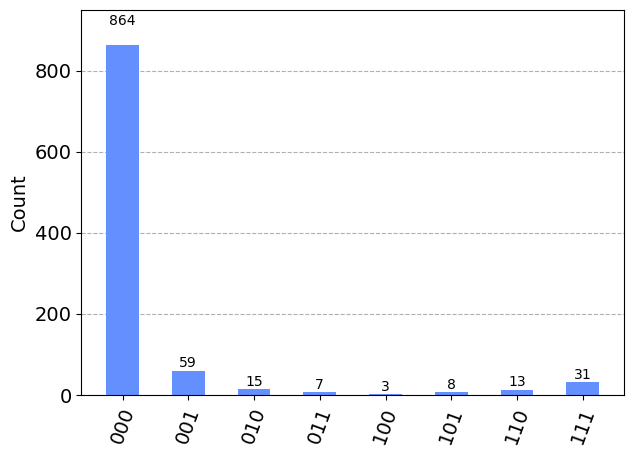

In [142]:
"""
3.2.a.3
"""

# Creating a single qubit circuit for the oracle
oracle2qc = qiskit.QuantumCircuit(1)
oracle2qc.rz(1/3,0) # Applying R_z(1/3) gate. 
# Using with eigenstate |1⟩, and 4 qubits.
eigenstate = 1
num_qubits = 4
phase_estimation(oracle2qc, eigenstate, num_qubits)[1]

Using the same number of qubits I cannot obtain an accurate result. Here, I expect $\theta$ = 0.02652 (obtained by solving $2\pi i \theta = \frac{-i}{6}$), but using the two most probably results, 000 and 001, I obtain $\theta$ = 0 and $\theta = \frac{1}{8}$ respectively. So, I must increase the number of qubits in order to obtain better accuracy.

(None, <matplotlib.legend.Legend at 0x2490a3a1690>)

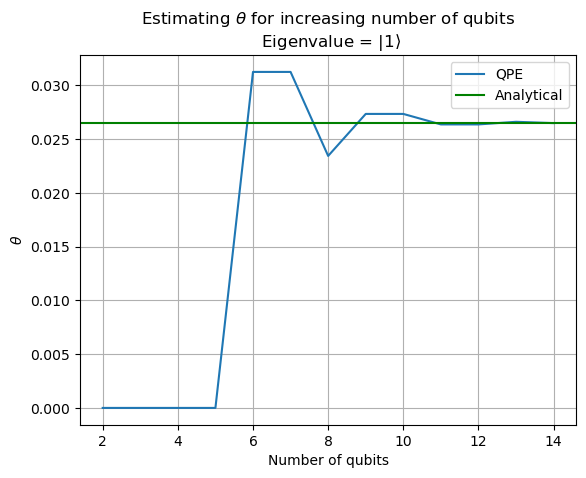

In [143]:
# Using with eigenstate |1⟩, and loop through qubits obtaining highest probabilty result for each.
eigenstate = 1
max_n = 15
max_vals = []
theta = np.zeros([max_n-2])

i = 0
for n_qubit in range(2,max_n):
    max_vals.append(phase_estimation(oracle2qc, eigenstate, n_qubit)[0])
    # Loops through string of highest probability value
    for j in range(len(max_vals[i])): 
        if max_vals[i][j] == '1':
            theta[i] += 1/2**(j+1)
        else:
            theta[i] += 0      
    i+=1
    
# Plotting results
plt.plot(range(2,max_n),theta, label = 'QPE')
plt.axhline(y=0.0265,color = 'g', label = 'Analytical')
plt.title('Estimating $\\theta$ for increasing number of qubits\n Eigenvalue = $|1\\rangle$')
plt.ylabel('$\\theta$'), plt.xlabel('Number of qubits')
plt.grid(True), plt.legend()    

## 3.2.b Analytical treatment of the error (4 pts.)
After the controlled application of the oracle, but before the final QFT, the state of the first $m$-qubit register is:
$$\ket{\theta} = \frac{1}{2^m} \sum_{k=0}^{2^m-1} e^{2\pi i k \theta} \ket{k}$$
where $\theta$ is the parameter to be estimated. 

<ol>
    <li>Apply the QFT to $\ket{\theta}$, and give an analytical expression for the output state.</li>
    <li>Determine the probability to obtain an outcome $j \in \{0,\ldots,2^m-1\}$ when performing the measurement.</li>
    <li>Show that, if there exists a $j=\tilde{j}$ such that $\theta=\frac{\tilde{j}}{2^m}$ (i.e., $\theta$ has an exact representation in $m$ bits), then the outcome of the measurement is $j$ with unit probability.</li>
    <li>If this is not the case, let $j^*$ be the specific value of $j$ which gives the best estimate $\frac{j^*}{2^m}$ of $\theta$. In other words, it should be true that $\theta = \frac{j}{2^m} +\varepsilon$, where $|\varepsilon| < 2^{-(m+1)}$. Prove that the probability of getting the outcome $j^*$ for the measurement is larger than $\frac{4}{\pi^2}$. </li>
</ol>

<b>Hint.</b> The following inequalities are given:
$$\frac{2\pi |\varepsilon| 2^m}{|e^{2\pi i \varepsilon 2^m}-1|}\leq \frac{\pi}{2}$$ <br>
$$|e^{2\pi i \varepsilon} - 1| \leq 2\pi |\varepsilon|$$

# 3.3 - Period finding (8 pts. total)
Consider a function $f:\mathbb{Z}_N\to C$, where $C$ is a finite set of values. Suppose that $f$ is known to be periodic; namely:
$$\exists s \in Z_N - \{0\} \mbox{ s.t. } f(x+s)=f(x)\,\,\,\, \forall x \in Z_N$$
Furthermore, in each period, each symbol appears only once.
The goal of this problem is to obtain $s$. For the sake of simplicity, assume $N = 2^n$ for some $n$.

## 3.3.a Classical version (2 pt.)
<ol>
  <li>Show that the periodicity condition implies that $s$ divides $N$. </li>
  <li>Show that the problem can be solved on a classical calculator with $\mathcal{O}(n)$ evaluations of the function $f$, where $n = \log_2 N$.  </li>
</ol>

## 3.3.b Quantum protocol (3 pts.)
Consider an oracle $O_f$, acting as follows:
$$O_f(\ket{x}\ket{b}) = \ket{x}\ket{b\oplus f(x)}$$
where $b$ is a string of length $m$, and $\oplus$ represents the sum modulus $2^m$. Consider the following protocol:
<ul>
  <li>Prepare the state 
    $$\frac{1}{\sqrt{N}} \sum_{x\in Z_N} \ket{x}$$
    These first qubits constitute the <b>first register</b>.
  </li>
  <li> Attach a <b>second register</b> in state $\ket{0^m}$.</li>
  <li> Query the oracle $O_f$ on the current input.</li>
  <li> Measure the second register in the computational basis.</li>
  <li> Apply the QFT to the first register.</li> 
  <li> Measure the first register. </li>
</ul>

<ol>
  <li>Let $c \in C$ be fixed. Show that the probability of obtaining $c$ as measurement outcome on the second register is $\frac{1}{s}$.</li>
  <li>Write the state of the first register after having obtained measuremetn outcome $c$ on the second register.</li>
</ol>

<b>Hint.</b> You may find it use useful to define the auxiliary function 
$$f_c(x) = \begin{cases}1 & \mbox{ if } f(x)=c \\ 0 & \mbox { otherwise}\end{cases}$$

## 3.3.c The Fourier coefficients /1 (1 pt.)
Consider a function $g: \mathbb{Z}_N \to C$ and a number $t \in \mathbb{Z}_N$. Let $k: \mathbb{Z}_N \to C$ be another function such that $k(x) = g(x+t)$. Show that $g$ and $k$ have the same Fourier coefficients, except for a multiplicative factor of absolute value 1.

Notice that it follows that the measurement outcome on the first register does not depend on the $c$ we measured on the second register. Without loss of generality, we can hence assume to have measured $f(0)=c$. Therefore:
$$f_c(x)=\begin{cases}1 & \mbox{ if } x=0,s,2s,\ldots \\ 0 & \mbox{ otherwise}\end{cases}$$

## 3.3.d The Fourier coefficients /2 (1 pt.)
Prove that $f_c(x)$ defined in this way has Fourier coefficients given by:
$$\hat{f_c}(\gamma) = \begin{cases}\frac{1}{s} & \mbox{ if } \gamma \in \{0, N/s, 2N/s,\ldots\} \\ 0 & \mbox{ otherwise}\end{cases}$$

It follows that, when performing the measurement on the first register, we are sampling uniformly a value of $\gamma$ from the set $\{0, N/s, 2N/s, \ldots \}$, or equivalently from the $\gamma$ values such that $\gamma s =0 \mod N$.

## 3.3.e Finding the period (1 pt.)
Describe how the measurement outcomes obtained from the measurement on the first register can be used to find the period of the function $f$.

# 3.4 - Factoring (6 pts. total)
The aim of this exercise is to build a specific implementation of Shor's factoring algorithm, which will allow factorisation of the number $15$. 

## 3.4.a Classical auxiliary functions  (1 pt.)
First of all, some classical subroutines are required. Write the following Python functions:
<ol>
    <li> <code>gcd(x,y)</code>, which computes the greatest common divisor between the numbers <code>x</code> and <code>y</code>. </li>
    <li> <code>verify_factor(N,x)</code>, which verifies whether <code>x</code> is a factor of <code>N</code>. 
</ol>
Discuss the scaling of the computational complexity of the latter function in terms of the number of bits required to encode $N$ and in reference to the complexity class *NP*.

In [144]:
"""
3.4.a
"""
def gcd(x,y):
    # If y == 0, x is the gcd
    if y == 0:
        return x
    else:
        return gcd(y, x%y)
    
def verify_factor(N,x):
    # If x divides into N evenly (No remainder) and N is greater than or equal to x, x is a factor of N
    if N%x == 0 and N>=x:
        return True
    else:
        return False
         

## 3.4.b Classical period finding (1 pt.)
Consider the function
$$f(x) = a^x \mod N$$
where $a$, $x$ and $N$ are numbers in $\mathbb{N}$, and $a$ is prime. It can be shown that the function $f(x)$ is periodic, and that each value of $f(x)$ appears only once in each period.

Define a Python function <code>classical_period_find(a,N)</code> that computes the period of the function $f(x)$ of the form specified above, for given $a$ and $N$. Discuss the complexity of the function, in terms of the bits required to encode $N$.

Next, define a Python function <code>period_verify(a,N,p)</code>, which verifies whether the proposed $p$ is the correct period of $f(x)$. Discuss its complexity in terms of the bits required for encoding $N$. Discuss the relation between <code>classical_period_find</code> and <code>period_verify</code> in reference to the complexity class *NP*.

In [145]:
"""
3.4.b
"""
def f(x,a,N):
    return (a**x) % N

def classical_period_find(a,N):
    f_1 = f(1,a,N) # Setting initial f(x) to f(1)
    
    for x in range(2, N+1):
        if f_1 == f(x, a, N):
            # If they are equal, we have began another period, so x-1 is the period of the function.
            return x-1
    return None

def period_verify(a,N,p):
    if classical_period_find(a,N) == p:
        return True
    else:
        return False

For classical_period_find(a,N), the number of bits required to encode N scales logarithmically, whereas for period_verify(a,N,p), it scales linearly as it is just a comparison between two numbers. classical_period_find is in NP.

## 3.4.c Quantum period finding (2pt.)
For the specific case of $a=2$, $N=15$, write the Qiskit code for quantum period finding (Shor's algorithm). 

In [233]:
"""
3.4.c
"""
def c_U15(power):
    """Controlled multiplication by 2 mod 15"""
    # Creating a circuit for the Unitary operation which will be converted to a gate
    Uqc = qiskit.QuantumCircuit(4)        
    for i in range(power):
        Uqc.swap(2,3)
        Uqc.swap(1,2)
        Uqc.swap(0,1)
    U_gate = Uqc.to_gate(label = '2^{} mod 15'.format(power))
    c_U = U_gate.control()
    return c_U

def shor_circ(qc,n_count):
    # Apply hadamrd gates to all counting qubits
    qc.h(range(n_count))
    
    # x gate to put auxiliary register in state |1>
    qc.x(n_count)

    # Apply controlled U
    for k in range(n_count):
        qc.append(c_U15(2**k),[k] + [i+n_count for i in range(4)])
    qc.barrier()
    
    # Apply QFT†
    inv_qft(qc,n_count)
    qc.barrier()
    
    # Apply measurements
    qc.measure(range(n_count),range(n_count))
    
    return qc
    
    
n_count = 4 # Counting qubits, need 4 more for the Unitary operation
# Create circuit for QPF (shor's algorithm)
QPFqc = qiskit.QuantumCircuit(n_count+4, n_count)
shor_circ(QPFqc,n_count)
QPFqc.draw()

┌───┐                                                             ░    »
q_0: ┤ H ├───────■─────────────────────────────────────────────────────░──X─»
     ├───┤       │                                                     ░  │ »
q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────░──┼─»
     ├───┤       │              │                                      ░  │ »
q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────░──┼─»
     ├───┤       │              │              │                       ░  │ »
q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────░──X─»
     ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐ ░    »
q_4: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├─░────»
     └───┘│             ││             ││             ││             │ ░    »
q_5: ─────┤1            ├┤1            ├┤1            ├┤1            ├─░────»
          │  2^1 mod 15 ││  2^2 mod 15 ││  2^4 mod 15 ││  2^8 mod 15 │ ░    »
q_6: ─────┤2            ├┤2            ├┤2            ├┤2            ├─░────»
          │             ││             ││             ││             │ ░    »
q_7: ─────┤3            ├┤3            ├┤3            ├┤3            ├─░────»
          └─────────────┘└─────────────┘└─────────────┘└─────────────┘ ░    »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«     ┌───┐                                                            »
«q_0: ┤ H ├─■──────────────■───────────────────■───────────────────────»
«     └───┘ │P(-π/2) ┌───┐ │                   │                       »
«q_1: ──X───■────────┤ H ├─┼─────────■─────────┼──────────────■────────»
«       │            └───┘ │P(-π/4)  │P(-π/2)  │        ┌───┐ │        »
«q_2: ──X──────────────────■─────────■─────────┼────────┤ H ├─┼────────»
«                                              │P(-π/8) └───┘ │P(-π/4) »
«q_3: ─────────────────────────────────────────■──────────────■────────»
«                                                                      »
«q_4: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«q_5: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«q_6: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«q_7: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«c: 4/═════════════════════════════════════════════════════════════════»
«                                                                      »
«                     ░ ┌─┐         
«q_0: ────────────────░─┤M├─────────
«                     ░ └╥┘┌─┐      
«q_1: ────────────────░──╫─┤M├──────
«                     ░  ║ └╥┘┌─┐   
«q_2: ─■──────────────░──╫──╫─┤M├───
«      │P(-π/2) ┌───┐ ░  ║  ║ └╥┘┌─┐
«q_3: ─■────────┤ H ├─░──╫──╫──╫─┤M├
«               └───┘ ░  ║  ║  ║ └╥┘
«q_4: ────────────────░──╫──╫──╫──╫─
«                     ░  ║  ║  ║  ║ 
«q_5: ────────────────░──╫──╫──╫──╫─
«                     ░  ║  ║  ║  ║ 
«q_6: ────────────────░──╫──╫──╫──╫─
«                     ░  ║  ║  ║  ║ 
«q_7: ────────────────░──╫──╫──╫──╫─
«                     ░  ║  ║  ║  ║ 
«c: 4/═══════════════════╩══╩══╩══╩═
«                        0  1  2  3

Most frequent outcomes:  {'1100': 242, '0100': 264, '1000': 263, '0000': 255}


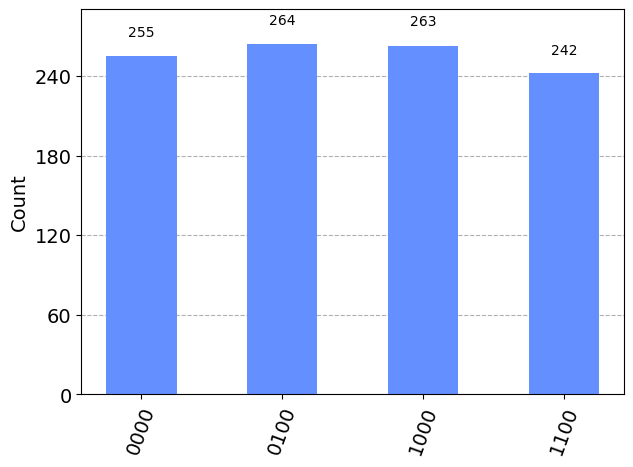

In [254]:
# Calculating results
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(QPFqc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
MFO = list(counts.keys()) # most frequent outcomes
print('Most frequent outcomes: ',counts)
plot_histogram(counts)

In [255]:
# Converting to decimal
for i in range(len(MFO)):
    MFO[i] = int(MFO[i],2)
MFO.sort()

Pass the most frequent outcomes to the following function, which estimates the compatible periods using a variant of the continuous-fractions algorithm. You can verify which one of the candidates is the correct period using the <code>period_verify</code> function.

In [256]:
def estimate_period(shor_result):
    res_range = 16
    
    if shor_result < res_range/2:
        shor_result = res_range - shor_result
        
    best_error = 1.
    e0 = 0
    e1 = 1
    e2 = 0
    
    actual = shor_result / res_range
    candidates = []
    
    for denominator in range(1, shor_result):
        numerator = round(denominator * actual)
        estimated = numerator / denominator 
        error = abs(estimated - actual)
        
        e0 = e1
        e1 = e2
        e2 = error
        
        if e1 <= best_error and e1 < e0 and e1 < e2:
            repeat_period = denominator - 1
            candidates.append(denominator - 1)
            best_error = e1
            
        if 0 in candidates:
            candidates.remove(0)
        
    return candidates

In [257]:
a = 2
N = 15
print('results:', MFO)

p1 = estimate_period(MFO[0])
p2 = estimate_period(MFO[1])
p3 = estimate_period(MFO[2])
p4 = estimate_period(MFO[3])

print(p1,p2,p3,p4)
print('r = 2?',period_verify(a,N,p3[0]))
print('r = 4?',period_verify(a,N,p2[0]))
print('r = 8?',period_verify(a,N,p2[1]))
print('r = 6?',period_verify(a,N,p3[2]))

results: [0, 4, 8, 12]
[] [4, 8] [2, 4, 6] [4, 8]
r = 2? False
r = 4? True
r = 8? False
r = 6? False


Therefore, our period is 4 as expected.

## 3.4.d Prime factoring (1 pt.)
Now, use the function <code>gcd</code> to return the factorisation of the number $15$ from Shor's algorithm. If $p$ is the period of the function $f(x)$, then one of $N$'s prime factor might be given by 
$$\gcd\left(N, a^{p/2}+1\right)$$
or by
$$\gcd\left(N, a^{p/2}-1\right)$$

In [261]:
factor1 = gcd(N,a**(p2[0]/2) + 1)
factor2 = gcd(N,a**(p2[0]/2) -1)

print('factors:',factor1,factor2)

factors: 5.0 3.0


## 3.4.e Order finding and period finding (1 pt.)
In this exercise, you have built Shor's factorisation algorithm in a sligthly different way than in the class, based on the <b>period finding</b> rather than on the <b>order finding</b>.

Period finding, as discussed above, aims at finding the least positive $r$ such that:
$$f(x+r) = f(x) \,\,\,\,\, \forall x$$

Order finding considers a specific function of the form:
$$ f(x) = a^x \mod N$$
and aims at finding the least $x\neq 0$ such that $f(x) = 1$. 

Show that order finding is a subclass of period finding. 